In [2]:
from sklearn import datasets

import numpy as np
import pandas as pd

In [3]:
data= np.loadtxt("data.csv", delimiter= ",")

data.shape

(100, 2)

In [17]:
# print(data)

df= pd.DataFrame(data)

df.columns= [ "feature1", "Result" ]

df.isnull().sum()

feature1    0
Result      0
dtype: int64

In [ ]:
# x= data[: , 0]
# print(x)
# print(x.shape)

### If we try to execute the above lines it will show the shape as ( 100,   ) --> which means that there are no columns and only single or 1 feature with 100 entries ( 1-D array ). 

### This will give error when we will apply the fit function because the training and testing data has to be in the the form of 2-D array that is in the form of rows and columns.

### Therefore we have reshaped our data below using reshape function --> reshape()

In [67]:
x= data[: , 0].reshape(-1, 1)
y= data[ :, 1]

# print(x)

print(x.shape)
print(y.shape)

(100, 1)
(100,)


In [69]:
# Training the algo

from sklearn import model_selection as ms
from sklearn.linear_model import LinearRegression

x_train,x_test,y_train,y_test= ms.train_test_split(x,y)

algo1= LinearRegression()

# x_train is 1-D data/ Single feature and the algo is made for 2-D data/ more than 1 feature
# That is why we are getting an error while traing our algorithm

# Solution is given below only
# Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) 
# if it contains a single sample.

# We will reshape while loading our X from dataset which is done in the 3 cell

algo1.fit(x_train, y_train)

y_predicted= algo1.predict(x_test)

print(algo1.coef_)
print(algo1.intercept_)

[1.19675233]
14.343395078692723


In [61]:
x_train.shape

(75, 1)

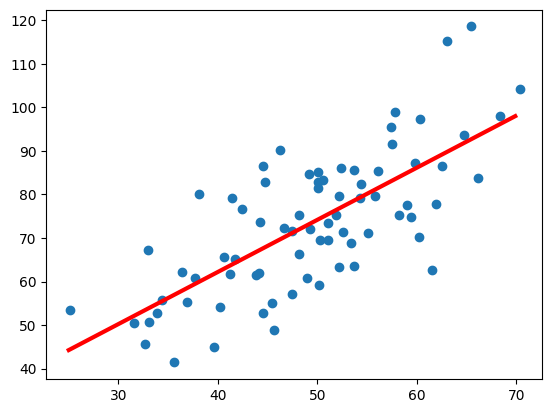

In [70]:
# Plotting the best fit line for training data
import matplotlib.pyplot as plt

m= algo1.coef_
c= algo1.intercept_

x= np.arange(25, 70, 0.1)

y= m*x + c

plt.plot(x, y, "r-", linewidth= 3)

# x_train_1D= x_train.reshape(1, 75)

x_train_1D= x_train.reshape(75)
plt.scatter(x_train_1D, y_train)

plt.show()

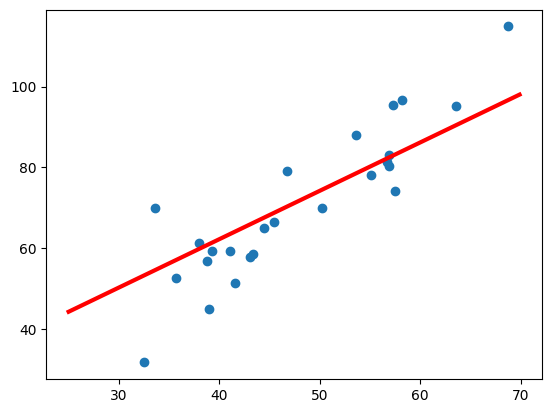

In [71]:
# plotting the best fit line and checking it for the testing data

x= np.arange(25, 70, 0.1)
y= m*x + c
plt.plot(x, y, "r-", linewidth= 3)

# x_test1D= x_test.reshape(25)

x_test1D= x_test.reshape(1, 25)

plt.scatter(x_test1D, y_test)

plt.show()

In [72]:
score_train= algo1.score(x_train, y_train)
score_test= algo1.score(x_test, y_test)

score_train, score_test

(0.5293395673282091, 0.7307076401984449)